In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Print some sample data
print(newsgroups.data[0])  # Example news article
print("Category:", newsgroups.target_names[newsgroups.target[0]])  # Corresponding category

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
Category: comp.graphics


In [3]:
# Convert text to numerical features using CountVectorizer and TfidfTransformer
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(newsgroups.data)

# Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Define the target labels
y = newsgroups.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [5]:
# Create Multinomial Naïve Bayes model
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [6]:
# Predict on test data
y_pred = nb_classifier.predict(X_test)

# Print predicted labels
print("Predicted Labels:", y_pred[:10])

Predicted Labels: [1 0 0 2 2 1 0 1 1 2]


Accuracy: 0.75

Classification Report:
                    precision    recall  f1-score   support

       alt.atheism       0.59      0.84      0.69        92
     comp.graphics       0.94      0.88      0.91       121
         sci.space       0.74      0.97      0.84       120
talk.religion.misc       0.80      0.05      0.10        74

          accuracy                           0.75       407
         macro avg       0.77      0.69      0.64       407
      weighted avg       0.78      0.75      0.69       407



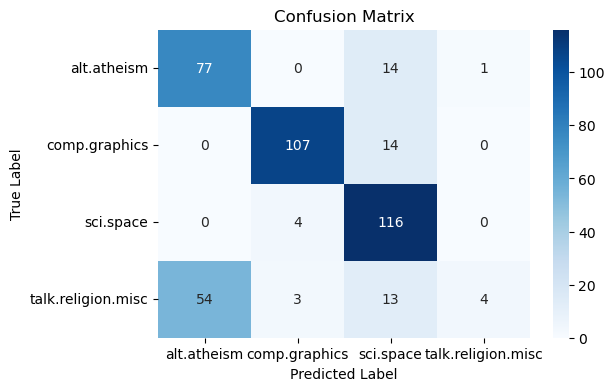

In [7]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()